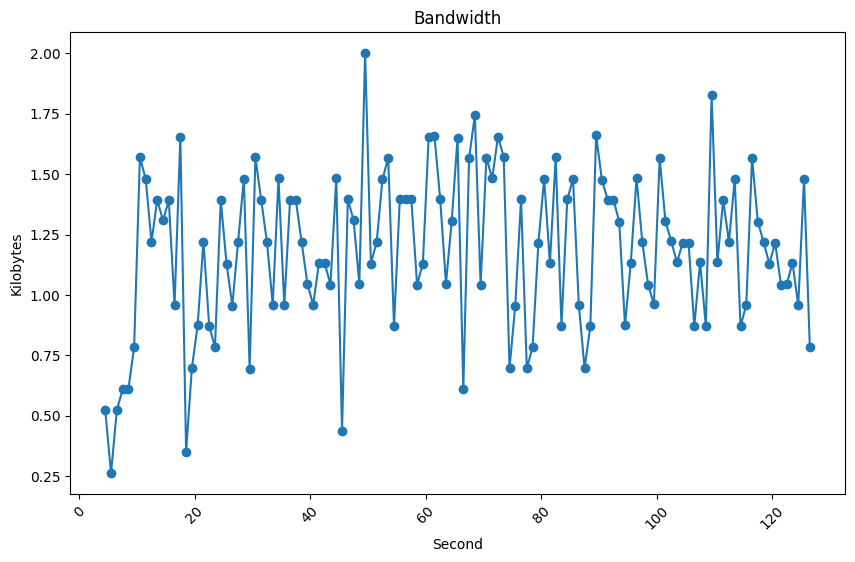

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# Path to your data file
file_path = '../server/logfile.txt'

# Open and read the file
with open(file_path, 'r') as file:
    data = file.read()

# Save the first line as the program start time
program_start_time = float(data.split('\n')[0].split(': ')[1])

# Remove the first line
data = '\n'.join(data.split('\n')[1:])

# Convert string data to DataFrame
df = pd.read_csv(StringIO(data), sep="\s+", header=None, names=["Time", "EventTime", "Bytes"])

# Convert Time to seconds (round down to nearest second)
df['Second'] = df['Time'].astype(int) - program_start_time


# Sum bytes read per second
bytes_per_second = df.groupby('Second')['Bytes'].sum().reset_index()

# Convert bytes to kilobytes (KB)
bytes_per_second['Bytes'] = bytes_per_second['Bytes'] / 1024
bytes_per_second.rename(columns={'Bytes': 'Kilobytes'}, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(bytes_per_second['Second'], bytes_per_second['Kilobytes'], marker='o')
plt.title('Bandwidth')
plt.xlabel('Second')
plt.ylabel('Kilobytes')
plt.grid(False)
plt.xticks(rotation=45)
# plt.tight_layout()

# Display plot
plt.show()

plt.savefig('Bandwidth_1.png')
